In [22]:
%load_ext autoreload
%autoreload 2
import os

import numpy as np
import pandas as pd

import fairlearn.moments as moments

from load_data import load_adult, load_compas


from util import _experiment, save_all_data, restore_all_data, summarize_stats, _plot



# In order to make debugging easier, leave the following two wrapper functions in this notebook rather than put them into
# util.py for now.

def experiment(dataset, rho, frac, eps_list, criteria, classifier, trials, include_sensible, filename, verbose=False):
    '''
    dataset: one of ['compas', 'adult']
    rho: [a, b] where a, b in interval [0,0.5]
    frac: real number in interval [0,1]. The fraction of the data points in chosen dataset to use.
    eps_list: a list of non-negative real numbers
    criteria: one of ['DP','EO']
    classifier: one of ['Agarwal', 'Zafar', 'Shai']. Zafar is the fastest.
                Shai will ignore eps_list since eps=0 is inherent in this implementation.
    trials: the number of trials to run
    include_sensible: boolean. If to include sensitive attribute as a feature for optimizing the oroginal loss. Note that even
                      if this is set to False, sensitive attribute will still be used for constraint(s).
    filename: the file name to store the log of experiment(s).
    verbose: boolean. If print out info at each run.
    '''
    sensible_name = None
    sensible_feature = None

    if dataset == 'adult':
        datamat = load_adult(frac)
        sensible_name = 'gender'
        sensible_feature = 9
    else:
        datamat = load_compas(frac)
        sensible_name = 'race'
        sensible_feature = 4
        
    if criteria == 'EO':
        tests = [{"cons_class": moments.EO, "eps": eps} for eps in eps_list]
    else:
        tests = [{"cons_class": moments.DP, "eps": eps} for eps in eps_list]

    all_data = _experiment(datamat, tests, rho, trials, sensible_name, sensible_feature, criteria, classifier, include_sensible, verbose)
    save_all_data(filename, all_data, eps_list)
    
    return all_data
        

def plot(filename):
    all_data, eps_list = restore_all_data(filename)
    data = summarize_stats(all_data)

    keys = ["disp_train", "disp_test", "error_train", "error_test"]
    xlabels = ['epsilon' for _ in range(4)]
    ylabels = ['violation', 'violation', 'error', 'error']
    for k, xl, yl in zip(keys, xlabels, ylabels):
        _plot(eps_list, data, k, xl, yl, filename)

        
log_dir = 'experiment_log/'
if not os.path.isdir(log_dir):
    os.mkdir(log_dir)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
from random import seed
SEED = 1122334455
seed(SEED) # set the random seed so that the random permutations can be reproduced again
np.random.seed(SEED)


dataset = 'compas'
rho = [0.4, 0.4]
frac = 1
eps_list = [0.03 * i for i in range(2, 9)]
criteria = 'DP'
classifier = 'Zafar'
trials = 5
include_sensible = False
filename = 'experiment_log/'+'all_data('+dataset+str(rho[0])+','+str(rho[1])+','+str(frac)+','+criteria \
           +','+classifier+','+str(trials)+','+str(include_sensible)+').pickle'
verbose = False

all_data = experiment(dataset, rho, frac, eps_list, criteria, classifier, trials, include_sensible, filename, verbose)


Looking for file 'datasets/compas-scores-two-years.csv' in the current directory...
File found in current directory..

Number of people recidivating within two years
0    2795
1    2483
dtype: int64


{'race': array([0, 0, 1, ..., 0, 0, 0])}
Features we will be using for classification are: ['intercept', 'age_cat_25 - 45', 'age_cat_Greater than 45', 'age_cat_Less than 25', 'race', 'sex', 'priors_count', 'c_charge_degree'] 

trial: 0 time: 2.1457672119140625e-06
trial: 1 time: 5.061856985092163
trial: 2 time: 9.915414094924927
trial: 3 time: 14.772420167922974
trial: 4 time: 19.697376012802124


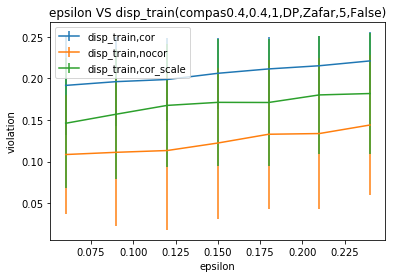

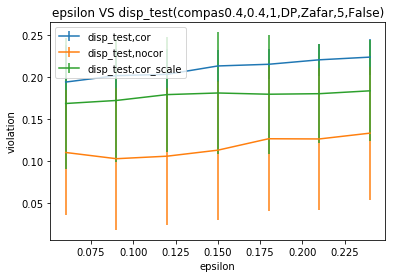

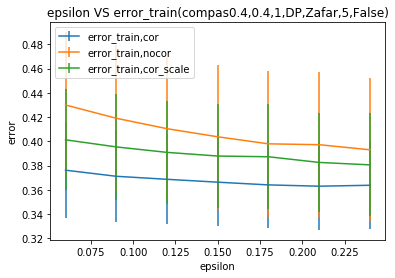

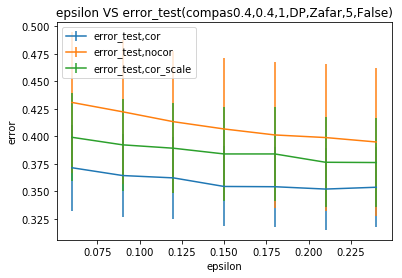

In [64]:
plot(filename)

In [59]:
SEED = 1122334455
seed(SEED) # set the random seed so that the random permutations can be reproduced again
np.random.seed(SEED)

dataset = 'compas'
rho = [0.4, 0.4]
frac = 1
eps_list = [0.03 * i for i in range(2, 9)]
criteria = 'DP'
classifier = 'Agarwal'
trials = 5
include_sensible = False
filename = 'experiment_log/'+'all_data('+dataset+str(rho[0])+','+str(rho[1])+','+str(frac)+','+criteria \
           +','+classifier+','+str(trials)+','+str(include_sensible)+').pickle'
verbose = False

all_data = experiment(dataset, rho, frac, eps_list, criteria, classifier, trials, include_sensible, filename, verbose)


Looking for file 'datasets/compas-scores-two-years.csv' in the current directory...
File found in current directory..

Number of people recidivating within two years
0    2795
1    2483
dtype: int64


{'race': array([0, 0, 1, ..., 0, 0, 0])}
Features we will be using for classification are: ['intercept', 'age_cat_25 - 45', 'age_cat_Greater than 45', 'age_cat_Less than 25', 'race', 'sex', 'priors_count', 'c_charge_degree'] 

trial: 0 time: 1.1920928955078125e-06
trial: 1 time: 195.97329306602478


/Users/ZiyuanZhong/.virtualenvs/ml3.6/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:273: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'sym_pos' to False.
  OptimizeWarning)
/Users/ZiyuanZhong/.virtualenvs/ml3.6/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:285: OptimizeWarning: Solving system with option 'sym_pos':False failed. This may happen occasionally, especially as the solution is approached. However, if you see this frequently, your problem may be numerically challenging. If you cannot improve the formulation, consider setting 'lstsq' to True. Consider also setting `presolve` to True, if it is not already.
  OptimizeWarning)


trial: 2 time: 366.68529415130615
trial: 3 time: 517.9586231708527
trial: 4 time: 664.3781361579895


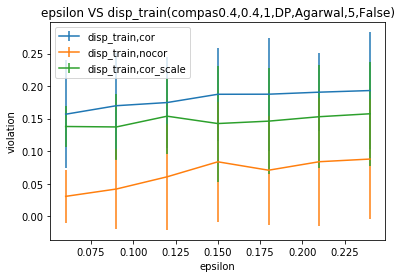

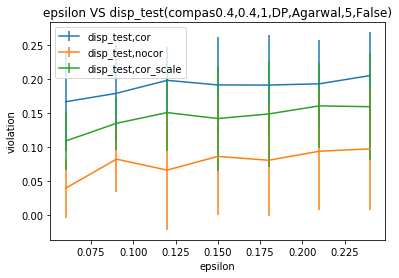

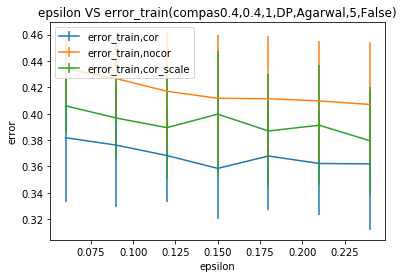

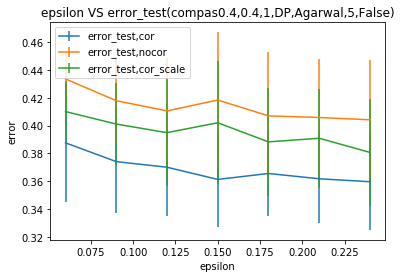

In [60]:
plot(filename)